In [1]:
import tensorflow as tf
from matplotlib.pyplot import figure
from tensorflow.keras import datasets, layers, models,constraints
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from libs import archanjo as arch
import cv2
import matplotlib.pyplot as plt
import os
import cv2
# import cv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [2]:
categorias = [0,1]
categorias_string = ["Hipertensos_Repouso_65_75_Supino","Saudaveis_Repouso_20_30_Supino"]

path_base = "/home/rafael/Documentos/FACOM/Mestrado/Materias/Defesa/Pesquisa/DSP/DataSet_VFC/New_Set/data/"

data_frame_cat = []
data_frame_numpy= []

for x in categorias:
    for class_data_dict in arch.coleta_dados(path_base + categorias_string[x]):
        name_user = class_data_dict[0]
        data = class_data_dict[1]
        sem_outliers = arch.removeoutlier(data.copy(), debug=False)
        estacionario = arch.select_estavel(sem_outliers)

        for data_ in estacionario:
            data_frame_cat.append(x)
            array_normalizado = arch.normalize(data_[1],0,255).astype(np.uint8)
            data_frame_numpy.append(array_normalizado)

data_frame_cat = np.array(data_frame_cat,dtype=np.int)
data_frame_numpy= np.array(data_frame_numpy,dtype=np.int)


In [3]:

rus = RandomUnderSampler(random_state=130,sampling_strategy = "majority"

)
train_images_balance_s,train_labels_balance_s, = rus.fit_resample(data_frame_numpy,data_frame_cat)


In [4]:

print(train_images_balance_s.shape)
print(train_labels_balance_s.shape)


(58, 256)
(58,)


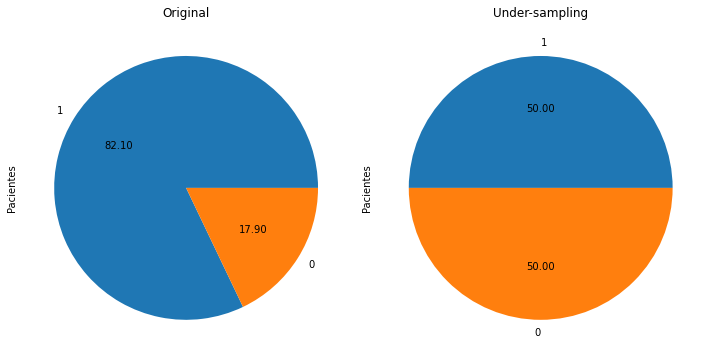

In [5]:
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].set_title("Original")
pd.Series(name='Pacientes',data=data_frame_cat).value_counts().plot.pie(autopct=autopct, ax=axs[0])
pd.Series(name='Pacientes',data=train_labels_balance_s).value_counts().plot.pie(autopct=autopct,ax=axs[1])
axs[1].set_title("Under-sampling")
fig.tight_layout()


In [6]:


train_images_balance, teste_images_predic, train_labels_balance, test_labels_predic = train_test_split(train_images_balance_s, train_labels_balance_s, shuffle=True, random_state=10, train_size=0.8)


print(train_labels_balance)
print(test_labels_predic)

print(train_labels_balance.shape)
print(test_labels_predic.shape)

[0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 0]
[1 0 1 0 0 0 1 0 0 0 1 1]
(46,)
(12,)


In [ ]:
data_x=[]
data_y=[]
value_list=10

for index_data in range(0,len(train_images_balance)):
    print(index_data)
    plot_list=arch.sintetiza_RR(train_images_balance[index_data],value_list=value_list,engine_value=100)
    for d_x in plot_list:
        list_ciruclar=arch.get_circular(np.array(d_x))
        for ar_cl in list_ciruclar:
            data_=[]
            for x in range(0,256):
                data_.append(ar_cl)
            data_x.append(np.array(data_))
            data_y.append(train_labels_balance[index_data])
            # data_x.append(ar_cl)
            # data_y.append(train_labels_balance[index_data])
print("fim")


In [12]:
data_x=[]
data_y=[]
i=0
for ar_cl in teste_images_predic:
    data_=[]
    for x in range(0,256):
        data_.append(ar_cl)
    data_x.append(np.array(data_))
    data_y.append(test_labels_predic[i])
    i=+1
# teste_images_predic
teste_images_predic = np.array(data_x,dtype=np.int)


In [8]:

train_labels_balance = np.array(data_y,dtype=np.int)
train_images_balance = np.array(data_x,dtype=np.int)

print(train_labels_balance)
print(train_images_balance.shape)
print(train_labels_balance.shape)

[0 0 0 ... 0 0 0]
(3680, 256, 256)
(3680,)


In [9]:
dimensao=(-1,256,256,1)
train_images_balance=train_images_balance.reshape(dimensao)/255


In [13]:
# train_images_balance=np.round(train_images_balance/1500,2)

teste_images_predic=teste_images_predic.reshape(dimensao)/255
# teste_images_predic=np.round(teste_images_predic/1500,2)/255

print(teste_images_predic.shape)
print(test_labels_predic.shape)
print(train_images_balance.shape)
print(train_labels_balance.shape)

(12, 256, 256, 1)
(12,)
(3680, 256, 256, 1)
(3680,)


In [14]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images_balance,train_labels_balance , shuffle=True, random_state=120, train_size=0.8)

print(train_labels)
print(test_labels)


print(train_images.shape)

print(test_images.shape)


[1 0 1 ... 1 1 0]
[0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 1 

In [17]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
# model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [ ]:
# from keras.utils.vis_utils import plot_model
#
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),  metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))



Epoch 1/5


/opt/anaconda/envs/RR/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 [==============================] - 286s 3s/step - loss: 1.6723 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 2/5
92/92 [==============================] - 297s 3s/step - loss: 0.6927 - accuracy: 0.5248 - val_loss: 0.6933 - val_accuracy: 0.5041
Epoch 3/5
92/92 [==============================] - 242s 3s/step - loss: 0.6920 - accuracy: 0.5262 - val_loss: 0.6935 - val_accuracy: 0.5041
Epoch 4/5
92/92 [==============================] - 264s 3s/step - loss: 0.6919 - accuracy: 0.5262 - val_loss: 0.6937 - val_accuracy: 0.5041
Epoch 5/5
92/92 [==============================] - 227s 2s/step - loss: 0.6919 - accuracy: 0.5262 - val_loss: 0.6937 - val_accuracy: 0.5041


In [ ]:
y_pred=model.predict(teste_images_predic)
y_pred_max = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_max)
print(test_labels_predic)
print(classification_report(test_labels_predic, y_pred_max))


### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [ ]:
test_loss, test_acc = model.evaluate(teste_images_predic,  test_labels_predic, verbose=2)
print(test_acc)